In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

In [2]:
'''cell only for reading time labels'''
from toolbox.methods import read_data
all_epochs, all_rawdata = read_data(amount_of_subjects=1,task='main',resample=True,resample_frequency=50)
time_labels = all_epochs[0].times
print(time_labels.shape)

Frequency before: 500.0
Frequency after: 50.0
(288,)


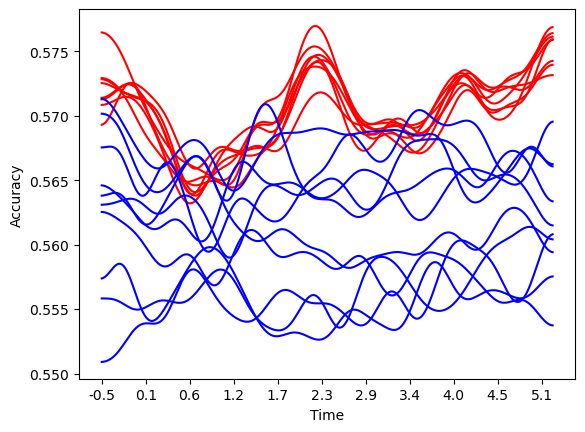

In [8]:
# list of dataframes
import math
display_count = 20
stride = math.ceil(len(time_labels) / display_count)
df_resp_list = []
for i in range(8):
    df_resp_list.append(pd.DataFrame(columns=range(26)))
    resp_50hz = np.load('results_deci_rf/timepoint_decision_{}.npy'.format(i), allow_pickle=True)
    for j in range(26):
        df_resp_list[i][j] = resp_50hz[j]
    df_resp_list[i]['mean'] = df_resp_list[i].mean(axis=1) 
    df_resp_list[i]['mean_filtered'] = gaussian_filter(df_resp_list[i]['mean'], sigma=10)
    plt.plot(df_resp_list[i]['mean_filtered'], color = 'red')

df_resp_shuffled_list = []
for i in range(10):
    df_resp_shuffled_list.append(pd.DataFrame(columns=range(26)))
    resp_50hz = np.load('results_deci_rf/timepoint_decision_shuffled_{}.npy'.format(i), allow_pickle=True)
    for j in range(26):
        df_resp_shuffled_list[i][j] = resp_50hz[j]
    df_resp_shuffled_list[i]['mean'] = df_resp_shuffled_list[i].mean(axis=1) 
    df_resp_shuffled_list[i]['mean_filtered'] = gaussian_filter(df_resp_shuffled_list[i]['mean'], sigma=10)
    plt.plot(df_resp_shuffled_list[i]['mean_filtered'], color = 'blue')

x_ticks = np.arange(0, len(time_labels), 28)
x_labels = ['{:.1f}'.format(time_labels[i]) for i in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.show()

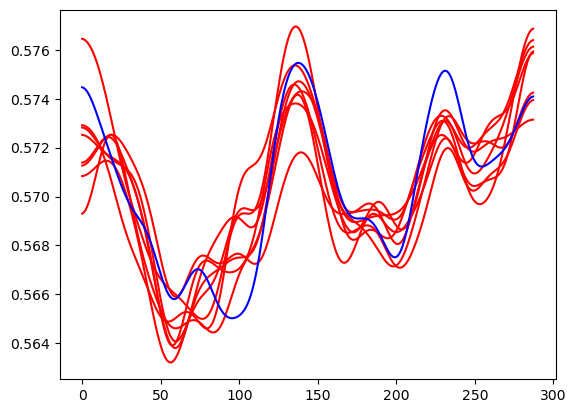

In [24]:
df_resp_list = []
for i in range(8):
    df_resp_list.append(pd.DataFrame(columns=range(26)))
    resp_50hz = np.load('results_deci_rf/timepoint_decision_{}.npy'.format(i), allow_pickle=True)
    for j in range(26):
        df_resp_list[i][j] = resp_50hz[j]
    df_resp_list[i]['mean'] = df_resp_list[i].mean(axis=1) 
    df_resp_list[i]['mean_filtered'] = gaussian_filter(df_resp_list[i]['mean'], sigma=10)
    plt.plot(df_resp_list[i]['mean_filtered'], color = 'red')

resp_50hz = np.load('results_deci_rf/timepoint_decision_weightless_0.npy', allow_pickle=True)
df_deci_weightless = pd.DataFrame(columns=range(26))
for j in range (26):
    df_deci_weightless[j] = resp_50hz[j]

df_deci_weightless['mean'] = df_deci_weightless.mean(axis=1)
df_deci_weightless['mean_filtered'] = gaussian_filter(df_deci_weightless['mean'], sigma=10)
plt.plot(df_deci_weightless['mean_filtered'], color = 'blue')

In [20]:
print((df_resp_list[0][25]))
for columns in range (26):
# create new column with mean for each other columns
    df_resp_list[0]['filtered'+str(columns)] = gaussian_filter(df_resp_list[0][columns], sigma=10)

0      0.461538
1      0.576923
2      0.461538
3      0.461538
4      0.423077
         ...   
283    0.538462
284    0.557692
285    0.538462
286    0.480769
287    0.557692
Name: 25, Length: 288, dtype: float64


In [7]:
for i in range(26):
    plt.plot(df_resp_list[0]['filtered'+str(i)], color = 'blue')
plt.plot(df_resp_list[0]['mean_filtered'], color = 'red', label =str(i
                                                                    ))
plt.legend()


KeyError: 'filtered0'